1. 读取data中2023_6文件夹中的openrank数据集，分析美国排名前一百的项目的的value的最大值、最小值、均值以及中位数。

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/2023_6/open_rank_20236.csv')

top100 = df.head(100)

# 计算统计值
stats = {
    '最大值': top100['value'].max(),
    '最小值': top100['value'].min(),
    '均值': top100['value'].mean(),
    '中位数': top100['value'].median()
}

for key, value in stats.items():
    print(f"{key}: {value:.2f}")

前100项目的OpenRank统计：
最大值: 1394.45
最小值: 200.68
均值: 346.97
中位数: 273.67

前5个项目示例：
                  item    value
0  home-assistant/core  1394.45
1     microsoft/vscode  1334.48
2        NixOS/nixpkgs  1240.31
3      flutter/flutter   886.61
4      pytorch/pytorch   803.78


2. 读取data中2022文件夹下的activity_2020文件，分析美国排名前十的项目的平均增长率。

In [8]:
import pandas as pd
import numpy as np

# 读取数据
df = pd.read_csv('data/2022/activity_2022.csv')

# 计算每个项目的平均增长率
# 使用最后一个月和第一个月的数据计算年度增长率
df['growth_rate'] = (df['202212_value'] - df['20221_value']) / df['20221_value'] * 100

# 计算所有项目的平均增长率
avg_growth_rate = df['growth_rate'].mean()

print("项目的增长率：")
for index, row in df.iterrows():
    print(f"{row['repo']}: {row['growth_rate']:.2f}%")
print(f"\n平均增长率: {avg_growth_rate:.2f}%")

项目的增长率：
MicrosoftDocs/azure-docs: -21.77%
NixOS/nixpkgs: -3.13%
dotnet/runtime: -26.05%
elastic/kibana: -13.14%
firstcontributions/first-contributions: 4.49%
flutter/flutter: -17.82%
home-assistant/core: 3.36%
microsoft/vscode: 22.89%
pytorch/pytorch: 12.83%
rust-lang/rust: -9.10%

平均增长率: -4.74%


3. data/2022/china_2022.csv表示中国开源领域排名前十的企业。data/2022/global_2022.csv表示开源领域全球前十的的企业，请通过各种统计指标比较两者的各种数据差异。

In [9]:
import pandas as pd
import numpy as np

# 读取数据
china_df = pd.read_csv('data/2022/china_2022.csv')
global_df = pd.read_csv('data/2022/global_2022.csv')

# 定义要比较的指标
metrics = ['issue_comment', 'open_issue', 'open_pull', 'review_comment', 
          'merged_pull', 'value']

# 计算并显示统计比较
print("中国企业 vs 全球企业统计比较：")
print("\n" + "="*50)

for metric in metrics:
    print(f"\n{metric}的统计比较：")
    
    china_stats = {
        '平均值': china_df[metric].mean(),
        '中位数': china_df[metric].median(),
        '标准差': china_df[metric].std(),
        '最大值': china_df[metric].max(),
        '最小值': china_df[metric].min()
    }
    
    global_stats = {
        '平均值': global_df[metric].mean(),
        '中位数': global_df[metric].median(),
        '标准差': global_df[metric].std(),
        '最大值': global_df[metric].max(),
        '最小值': global_df[metric].min()
    }
    
    print("\n中国企业：")
    for k, v in china_stats.items():
        print(f"{k}: {v:,.2f}")
    
    print("\n全球企业：")
    for k, v in global_stats.items():
        print(f"{k}: {v:,.2f}")
    
    # 计算差异倍数
    avg_ratio = global_stats['平均值'] / china_stats['平均值']
    print(f"\n全球/中国平均值比率: {avg_ratio:.2f}倍")

中国企业 vs 全球企业统计比较：


issue_comment的统计比较：

中国企业：
平均值: 61,205.50
中位数: 39,141.00
标准差: 49,332.49
最大值: 167,814.00
最小值: 11,741.00

全球企业：
平均值: 341,409.40
中位数: 178,629.00
标准差: 422,610.26
最大值: 1,437,317.00
最小值: 78,530.00

全球/中国平均值比率: 5.58倍

open_issue的统计比较：

中国企业：
平均值: 9,169.20
中位数: 6,889.50
标准差: 6,810.65
最大值: 22,397.00
最小值: 752.00

全球企业：
平均值: 43,300.20
中位数: 21,648.00
标准差: 54,001.07
最大值: 189,185.00
最小值: 13,162.00

全球/中国平均值比率: 4.72倍

open_pull的统计比较：

中国企业：
平均值: 16,912.70
中位数: 15,953.00
标准差: 10,068.92
最大值: 35,266.00
最小值: 1,823.00

全球企业：
平均值: 83,423.00
中位数: 49,103.50
标准差: 87,658.30
最大值: 309,685.00
最小值: 27,414.00

全球/中国平均值比率: 4.93倍

review_comment的统计比较：

中国企业：
平均值: 19,857.50
中位数: 10,851.00
标准差: 21,115.07
最大值: 60,402.00
最小值: 2,113.00

全球企业：
平均值: 120,392.10
中位数: 70,433.50
标准差: 128,239.76
最大值: 456,166.00
最小值: 35,072.00

全球/中国平均值比率: 6.06倍

merged_pull的统计比较：

中国企业：
平均值: 13,764.10
中位数: 13,705.50
标准差: 7,692.75
最大值: 26,732.00
最小值: 1,165.00

全球企业：
平均值: 62,472.00
中位数: 33,288.00
标准差: 73,265.18
最大值: 257,123.00


4. 贝叶斯定理

    贝叶斯定理参考：https://zh.wikipedia.org/wiki/%E8%B4%9D%E5%8F%B6%E6%96%AF%E5%AE%9A%E7%90%86

    根据 OpenLeaderboard 上对前 10000 个活跃的项目统计，工具组件型项目占比 50 %，系统应用型占比 25 %，而内容资源型（非软件类）项目占比 25 %，成三分天下的态势。

    非软件类项目中，带有 HTML/Markdown 标签的项目占 85 %，而软件类项目中带 HTML/Markdown标签的项目占比则为 10 %（注：HTML/Markdown 一般可用来书写文档内容）

    工具组件型项目中，JavaScript 语言的项目占比 35 %，而非工具组件型项目中， JavaScript 语言的项目占比则为 10 %（注：JavaScript 是一种脚本编程语言，可以在网页上实现复杂的功能）

    已知一个项目带有 HTML/Markdown 标签，那么该项目是非软件型项目的概率是多少？

In [10]:
# 已知条件
P_non_software = 0.25  # 非软件类项目概率
P_software = 0.75      # 软件类项目概率
P_html_given_non_software = 0.85  # 非软件类项目中有HTML标签的概率
P_html_given_software = 0.10      # 软件类项目中有HTML标签的概率

# 计算P(非软件|HTML)
P_html = P_html_given_non_software * P_non_software + P_html_given_software * P_software
P_non_software_given_html = (P_html_given_non_software * P_non_software) / P_html

print(f"带有HTML/Markdown标签的项目是非软件型项目的概率为：{P_non_software_given_html:.2%}")

带有HTML/Markdown标签的项目是非软件型项目的概率为：73.91%


5. 接上文，已知一个项目是由 JavaScript 语言编写的，那么它是工具组件型项目的概率是多少？

In [11]:
# 已知条件
P_tool = 0.50  # 工具组件型项目概率
P_non_tool = 0.50  # 非工具组件型项目概率
P_js_given_tool = 0.35  # 工具组件型项目中JavaScript的概率
P_js_given_non_tool = 0.10  # 非工具组件型项目中JavaScript的概率

# 计算P(工具组件|JavaScript)
P_js = P_js_given_tool * P_tool + P_js_given_non_tool * P_non_tool
P_tool_given_js = (P_js_given_tool * P_tool) / P_js

print(f"JavaScript项目是工具组件型项目的概率为：{P_tool_given_js:.2%}")

JavaScript项目是工具组件型项目的概率为：77.78%


6. 根据以下数据建立可视化无向图

    user = [1, 2, 3, 4] 

    edge = [(1, 2), (2, 3), (3, 4), (4, 1)]

C:\Users\HUAWEI\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26080 (\N{CJK UNIFIED IDEOGRAPH-65E0}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


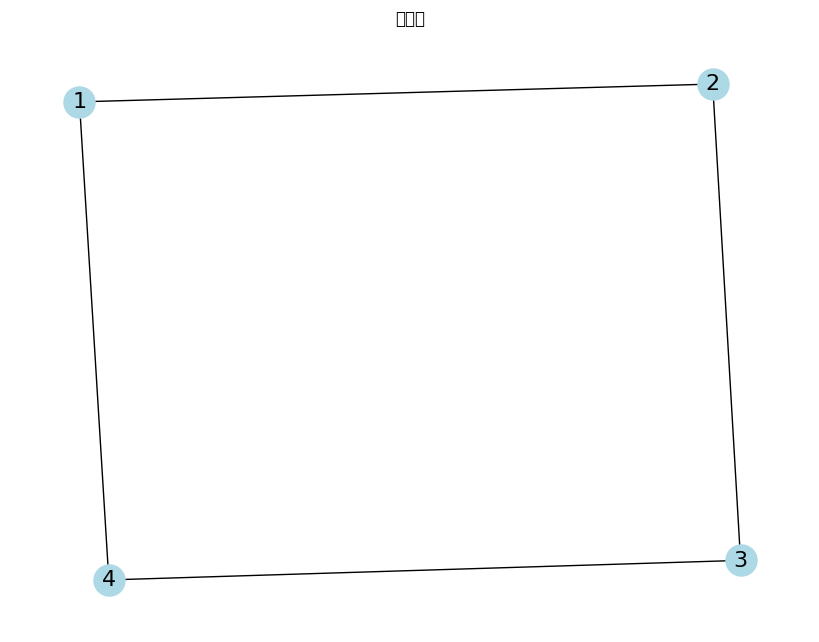

In [16]:
import networkx as nx
import matplotlib.pyplot as plt

# 创建无向图
G = nx.Graph()
user = [1, 2, 3, 4]
edge = [(1, 2), (2, 3), (3, 4), (4, 1)]

G.add_nodes_from(user)
G.add_edges_from(edge)

# 绘制图形
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='lightblue', 
        node_size=500, font_size=16)
plt.title("无向图")
plt.show()

7. 根据以下数据建立可视化**有向图**

    users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    
    edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2),
                (2, 1), (1, 3), (2, 3), (3, 4), (5, 4),
                (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

C:\Users\HUAWEI\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26377 (\N{CJK UNIFIED IDEOGRAPH-6709}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


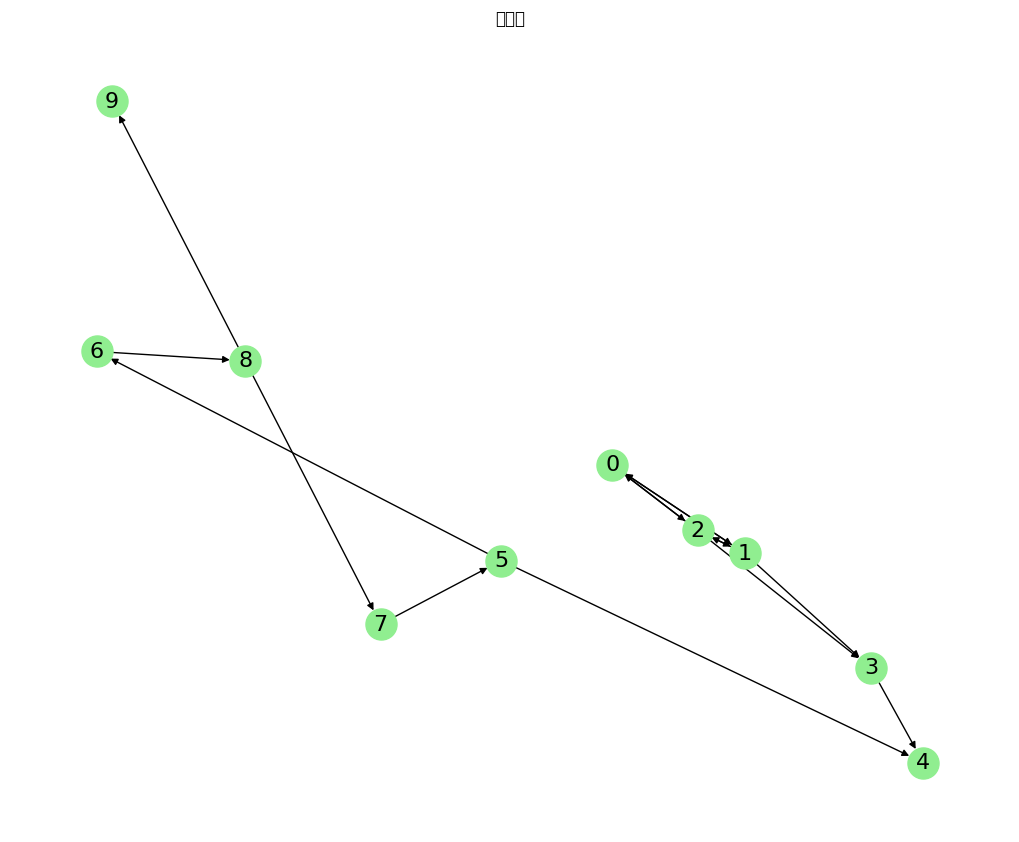

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

# 创建有向图
G = nx.DiGraph()
users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2),
         (2, 1), (1, 3), (2, 3), (3, 4), (5, 4),
         (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

G.add_nodes_from(users)
G.add_edges_from(edges)

# 绘制图形
plt.figure(figsize=(10, 8))
nx.draw(G, with_labels=True, node_color='lightgreen',
        node_size=500, font_size=16)
plt.title("有向图")
plt.show()

8. 针对第七题构建的有向图，计算并输出每个节点的pagerank值。同时根据pagerank调整可视化图的大小，使得PageRank越大的节点在可视化结果中也越大。
    pageRank算法原理：https://zh.wikipedia.org/wiki/PageRank

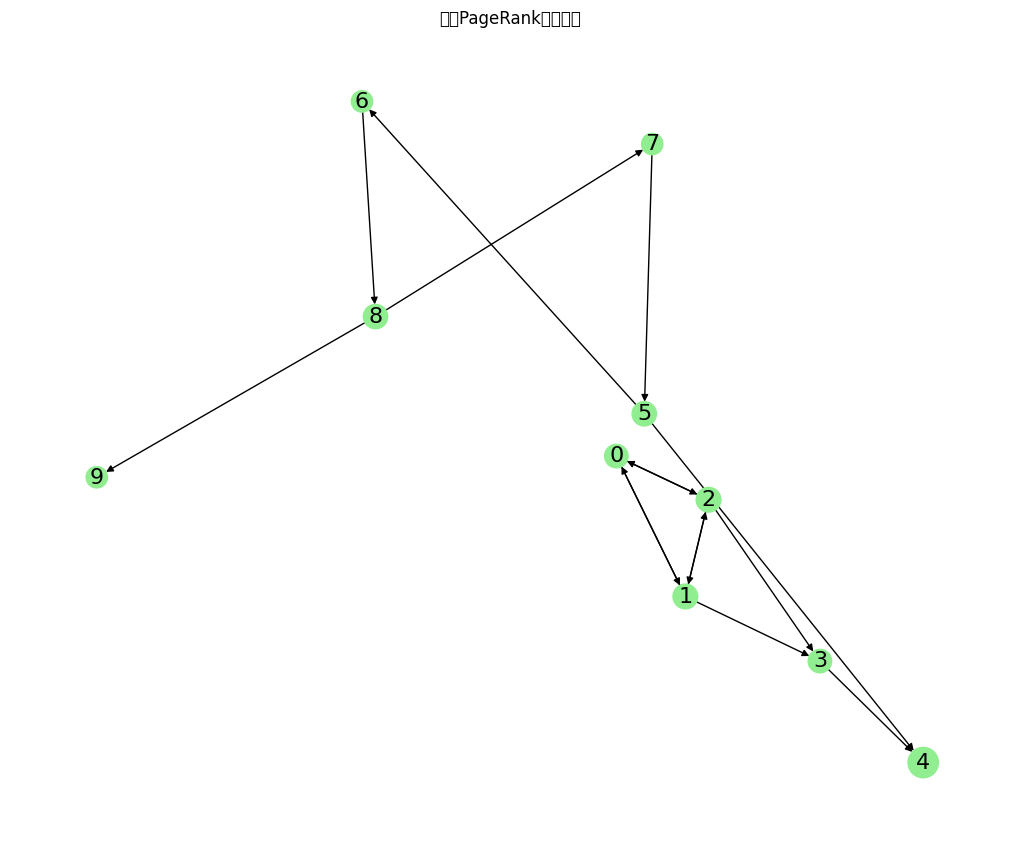


PageRank值:
节点 0: 0.0950
节点 1: 0.1055
节点 2: 0.1055
节点 3: 0.0950
节点 4: 0.1593
节点 5: 0.1020
节点 6: 0.0786
节点 7: 0.0786
节点 8: 0.1020
节点 9: 0.0786


In [15]:
import networkx as nx
import matplotlib.pyplot as plt

# 使用之前创建的有向图G
pagerank = nx.pagerank(G)

# 根据PageRank值设置节点大小
node_sizes = [v * 3000 for v in pagerank.values()]

# 绘制图形
plt.figure(figsize=(10, 8))
nx.draw(G, with_labels=True, node_color='lightgreen',
        node_size=node_sizes, font_size=16)
plt.title("基于PageRank的有向图")
plt.show()

# 输出每个节点的PageRank值
print("\nPageRank值:")
for node, rank in pagerank.items():
    print(f"节点 {node}: {rank:.4f}")